# Raising Awareness Of Air Pollution In Nigeria


## Importing necessary libraries for analysis



In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset and checking the data

In [3]:
# Load the dataset
air = pd.read_csv("/content/drive/MyDrive/AirQuality/Port Harcourt, Nigeria (4.80678 7.002953).csv")

In [4]:
# Preview the top of our data
air.head(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84
5,2021-07-26 16:58:11 UTC,203,89,50,34.70
6,2021-07-26 17:00:08 UTC,204,89,51,33.83
7,2021-07-26 17:02:05 UTC,205,89,50,36.20
8,2021-07-26 17:04:02 UTC,206,89,50,32.63
9,2021-07-26 17:06:00 UTC,207,88,50,32.60


In [5]:
# Preview the bottom of our data
air.tail(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
56042,2021-10-25 09:18:40 UTC,56240,86,62,28.88
56043,2021-10-25 09:20:40 UTC,56241,86,61,26.74
56044,2021-10-25 09:22:42 UTC,56242,87,61,28.71
56045,2021-10-25 09:24:44 UTC,56243,87,61,31.04
56046,2021-10-25 09:26:47 UTC,56244,87,61,28.90
56047,2021-10-25 09:28:43 UTC,56245,87,61,29.17
56048,2021-10-25 09:30:43 UTC,56246,87,61,29.57
56049,2021-10-25 09:32:44 UTC,56247,87,61,28.75
56050,2021-10-25 09:34:44 UTC,56248,87,61,29.97
56051,2021-10-25 09:36:44 UTC,56249,87,60,30.25


In [6]:
# Checking the shape of our data
air.shape

(56052, 5)

Our dataset has 56052 observations and 5 features/variables.

In [7]:
# Let's describe the data
air.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926
std,16180.962981,4.319505,8.550730,42.205997
min,198.000000,70.000000,29.000000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000
max,56249.000000,108.000000,89.000000,568.080000


The minimum and max value for the PM2.5 feature are too wide apart. The max and the 75% value are also too far apart as well. This leads to a suspicion of outliers present. We will check for these as we go through the project.

In [8]:
# Checking the info of our data
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       56052 non-null  object 
 1   entry_id         56052 non-null  int64  
 2   Temperature_F    56052 non-null  int64  
 3   Humidity_%       56052 non-null  int64  
 4   PM2.5_ATM_ug/m3  56052 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


The created_at column is an object, however this column's data points are date and time observations which we could transform and separate into date and time columns.

All the other columns are of numeric data type ie. int64 or float64

### Cleaning the data

In [9]:
# Let's check for missing values
air.isnull().sum().sum()

0

We have no null values in the dataset.

In [10]:
# Let's check for duplicates
air.duplicated().sum().sum()

0

There are no duplicated observations.

In [11]:
# Are there any unique values in each column entry in the dataset?
for i in air.columns:
 print(air[i].unique())
 print ("\n")

['2021-07-26 16:45:59 UTC' '2021-07-26 16:48:03 UTC'
 '2021-07-26 16:49:59 UTC' ... '2021-10-25 09:32:44 UTC'
 '2021-10-25 09:34:44 UTC' '2021-10-25 09:36:44 UTC']


[  198   199   200 ... 56247 56248 56249]


[ 89  88  87  86  85  84  83  82  81  78  90  91  92  93  94  96  95  97
  98  99 100 101 102  79  80  75  76  77 103  73 104 105 106  70  74 107
 108  72]


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 49 48 47 46 45 44
 43 42 41 40 39 38 37 36 35 34 33 30 29 31 32 68 70 71 72 69 86 85 84 83
 82 81 80 79 78 77 76 75 74 73 87 89 88]


[40.78 40.09 37.93 ... 83.85 80.34  6.64]




There are no unique values. This is because our data does not consist of categorical variables. All varaiables are continuous in nature and of date-time type.

(56052, 4)


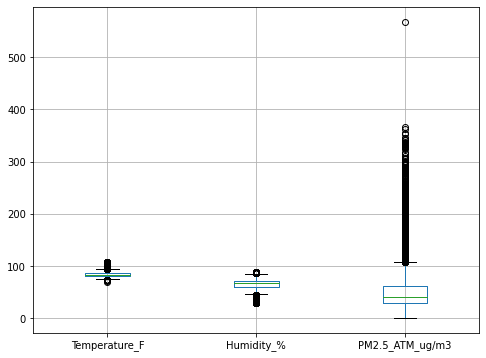

In [12]:
# checking for outliers 
air_out = air.drop(['entry_id'],axis=1) 
air_out.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(air_out.shape)

In [13]:
# Let's check the ouliers present in the PM2.5 clearly 
# as the boxplot is not quite as clear.

# Checking for outliers in the PM2.5 column

Q1 = air["PM2.5_ATM_ug/m3"].quantile(0.25)
Q3 = air["PM2.5_ATM_ug/m3"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["PM2.5_ATM_ug/m3"] < Q1 - 1.5 * IQR) | (air["PM2.5_ATM_ug/m3"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    50004
True      6048
Name: PM2.5_ATM_ug/m3, dtype: int64

In [14]:
# Checking for outliers in the Temperature_F column

Q1 = air["Temperature_F"].quantile(0.25)
Q3 = air["Temperature_F"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Temperature_F"] < Q1 - 1.5 * IQR) | (air["Temperature_F"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54304
True      1748
Name: Temperature_F, dtype: int64

In [15]:
# Checking for outliers in the Humidity_% column

Q1 = air["Humidity_%"].quantile(0.25)
Q3 = air["Humidity_%"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Humidity_%"] < Q1 - 1.5 * IQR) | (air["Humidity_%"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54322
True      1730
Name: Humidity_%, dtype: int64

Seems that there are quite a number of outliers in the columns;

* PM2.5 column (6048 outlires)

* Temperature_F (1748 outliers)

* Humidity_% (1730 outliers)

However we will not drop them as they could be relevant to the study.

In [16]:
# Let's transform the created_at column into date and time
# First Let's create a copy of our data set
air_df = air.copy()

# Let's check if our copy has been made
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84


In [17]:
# Convert date and time to appropriate dtypes
air_df['created_at'] = pd.to_datetime(air_df['created_at'])

In [18]:
# Lets check if the dtype has changed
air_df.created_at.dtype

datetime64[ns, UTC]

In [19]:
# Let's separate the column created_at into date and time columns
air_df['date'] = pd.to_datetime(air_df['created_at']).dt.date
air_df['time'] = pd.to_datetime(air_df['created_at']).dt.time

In [20]:
# Let's check if our columns have been created
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time
0,2021-07-26 16:45:59+00:00,198,89,50,40.78,2021-07-26,16:45:59
1,2021-07-26 16:48:03+00:00,199,89,50,40.09,2021-07-26,16:48:03
2,2021-07-26 16:49:59+00:00,200,89,50,37.93,2021-07-26,16:49:59
3,2021-07-26 16:54:03+00:00,201,89,50,33.18,2021-07-26,16:54:03
4,2021-07-26 16:55:59+00:00,202,89,50,37.84,2021-07-26,16:55:59


Our columns have been created so let's drop the created_at column.

In [21]:
# Dropping the created_at column
#air_df.drop(columns=['created_at'],inplace=True)
#checking if column is dropped
#air_df.head()

In [22]:
# Rearranging the columns
air_df = air_df[['created_at','date', 'time', 'Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84


In [23]:
# checking the data type for the date and time columns
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       56052 non-null  datetime64[ns, UTC]
 1   date             56052 non-null  object             
 2   time             56052 non-null  object             
 3   Temperature_F    56052 non-null  int64              
 4   Humidity_%       56052 non-null  int64              
 5   PM2.5_ATM_ug/m3  56052 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [24]:
# convert date column and time column to appropriate dtype
# convert the 'Date' column to datetime format
air_df['date']= pd.to_datetime(air_df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       56052 non-null  datetime64[ns, UTC]
 1   date             56052 non-null  datetime64[ns]     
 2   time             56052 non-null  object             
 3   Temperature_F    56052 non-null  int64              
 4   Humidity_%       56052 non-null  int64              
 5   PM2.5_ATM_ug/m3  56052 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.6+ MB


In [26]:
# Creating a month column by extracting months from the date column
air_df['month'] = air_df['date'].dt.month
# Let's check the column month
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,month
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78,7
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09,7
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93,7
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18,7
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84,7


In [27]:
# convert a month number to month name
import calendar
air_df['month'] = air_df['month'].apply(lambda x: calendar.month_abbr[x]) # got converting code from stack overflow

In [28]:
# checking for unique values in the month column
print(air_df.month.unique())

['Jul' 'Aug' 'Sep' 'Oct']


The months in which the data seem to have been collected are from the months; July(7), August(8), September(9) and October(10).

In [29]:
# Creating a year column by extracting months from the date column
air_df['year'] = air_df['date'].dt.year
# Let's check the column month
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,month,year
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78,Jul,2021
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09,Jul,2021
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93,Jul,2021
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18,Jul,2021
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84,Jul,2021


In [30]:
# checking for unique values in the month column
print(air_df.year.unique())

[2021]


The data is from just a specific year ie. 2021

In [31]:
# Rearranging the columns again
air_df = air_df[['created_at','date', 'time','month','year', 'Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air_df.head()

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,Jul,2021,89,50,40.78
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,Jul,2021,89,50,40.09
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,Jul,2021,89,50,37.93
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,Jul,2021,89,50,33.18
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,Jul,2021,89,50,37.84


About PM2.5 
- They are fine particulate matter less than 2.5 micrometres in diameter.

- At elevated levels, they reduce visibility, cause the air to appear hazy, and are a health concern.

- Some examples of PM2.5 are dust, spores, pollen and emissions from the combustion of diesel, gasoline, oil or wood.

- Elevated levels of PM2.5 can result in harmful effects such as heart disease, throat infections, lung cancer, chronic bronchitis, asthma attacks, and other respiratory diseases. 

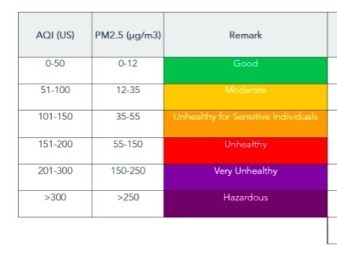

In [32]:
# Let's add a categorical column in regards to the PM2.5 levels 
# for easier and comprehensive analysis
air_df['AQI'] = ''
# check if new column has been created
air_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,AQI
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,Jul,2021,89,50,40.78,
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,Jul,2021,89,50,40.09,
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,Jul,2021,89,50,37.93,
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,Jul,2021,89,50,33.18,
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,Jul,2021,89,50,37.84,


In [49]:
# Let's add values to the Air Quality Index(AQI) Column
# depending on the PM2.5 Levels
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=0)&(air_df['PM2.5_ATM_ug/m3']<=12), 'AQI'] = 'Good'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=13)&(air_df['PM2.5_ATM_ug/m3']<=35), 'AQI'] = 'Moderate'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=36)&(air_df['PM2.5_ATM_ug/m3']<=55), 'AQI'] = 'Unhealthy sensitive'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=56)&(air_df['PM2.5_ATM_ug/m3']<=150), 'AQI'] = 'Unhealthy'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=151)&(air_df['PM2.5_ATM_ug/m3']<=250), 'AQI'] = 'Very Unhealthy'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>250), 'AQI'] = 'Hazardous'


In [50]:
air_df.sample(10)

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,AQI
22744,2021-08-30 07:37:57+00:00,2021-08-30,07:37:57,Aug,2021,85,69,59.64,Unhealthy
3499,2021-07-31 22:50:08+00:00,2021-07-31,22:50:08,Jul,2021,84,66,206.46,Very Unhealthy
15155,2021-08-18 15:24:00+00:00,2021-08-18,15:24:00,Aug,2021,86,60,27.43,Moderate
30481,2021-09-11 12:15:04+00:00,2021-09-11,12:15:04,Sep,2021,93,49,40.02,Unhealthy sensitive
32093,2021-09-13 20:38:31+00:00,2021-09-13,20:38:31,Sep,2021,82,71,33.07,Moderate
33779,2021-09-16 10:59:11+00:00,2021-09-16,10:59:11,Sep,2021,92,48,19.93,Moderate
8833,2021-08-08 16:04:15+00:00,2021-08-08,16:04:15,Aug,2021,80,69,26.52,Moderate
23819,2021-08-31 20:45:22+00:00,2021-08-31,20:45:22,Aug,2021,85,68,50.42,Unhealthy sensitive
55388,2021-10-23 15:10:45+00:00,2021-10-23,15:10:45,Oct,2021,86,64,44.42,Unhealthy sensitive
42606,2021-09-30 16:57:44+00:00,2021-09-30,16:57:44,Sep,2021,87,61,19.95,Moderate


## Exploratory Data Analysis

### Univariate Analysis

As we examine the shape of our data, we will perform univariate analysis.

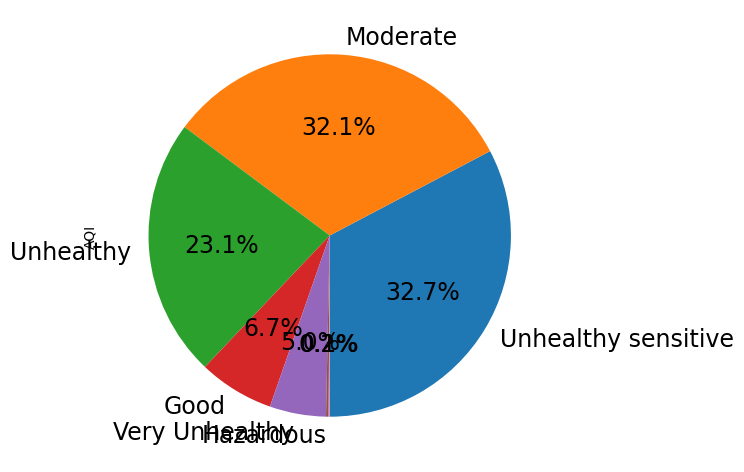

In [51]:
# Let's examine the Air quality index column
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

Value = air_df.AQI.value_counts()

Value.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

From the pie chart we can see 32.7% of the air quality is in the **unhealthy sensitive**  category index. Only 6.7% of the air quality is in the **Good** category index. 

Lets create  a better visualization of this.

In [53]:
# Using a bar plot to visualize
# creating the bar plot
# Counting the occurrences of each unique category
GroupData=air_df.groupby(by='AQI').size()
print(GroupData)

AQI
                          55
Good                    3773
Hazardous                128
Moderate               17981
Unhealthy              12963
Unhealthy sensitive    18334
Very Unhealthy          2818
dtype: int64


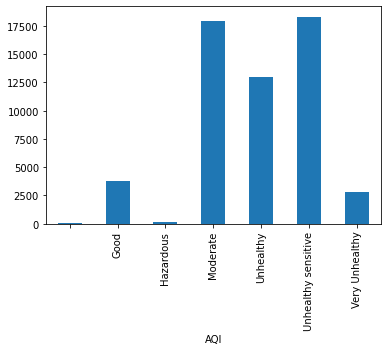

In [54]:
# Generating a bar chart for a single column
GroupData.plot.bar()

The air quality has mostly  been between the  **Moderate**,**Unhealthy** and **unhealthy** **sensitive** index ranges. 

The air quality has rarely been hazrdous as seen from the plot.

There are also observations that do not have a label to them.

### Bivariate Analysis

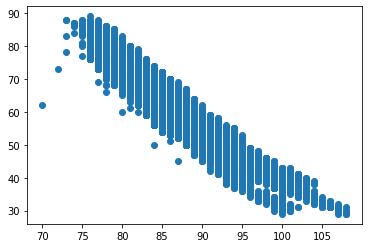

In [55]:
# Lets evaluate the relationship between Temperature and Humidity
x = air_df['Temperature_F']
y = air_df['Humidity_%']

plt.scatter(x, y)
plt.show()

Temperature and humidity have a strong negative correlation. As the temperature increases the humidity decreases.

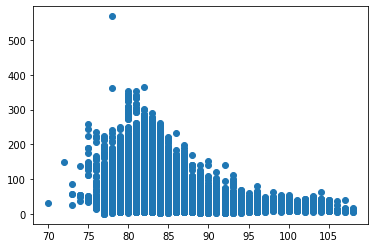

In [56]:
# Lets evaluate the relationship between Temperature and PM2.5
x = air_df['Temperature_F']
y = air_df['PM2.5_ATM_ug/m3']

plt.scatter(x, y)
plt.show()

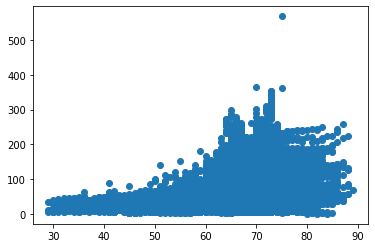

In [40]:
# Lets evaluate the relationship between PM2.5 and Humidity
x = air_df['Humidity_%']
y = air_df['PM2.5_ATM_ug/m3']

plt.scatter(x, y)
plt.show()

It seems that as humidity increases so does the level of PM2.5. We will create a correlation heat map to clearly see the strength of this relation.

Text(0.5, 1.0, 'Air Quality by month, Divided by AQI')

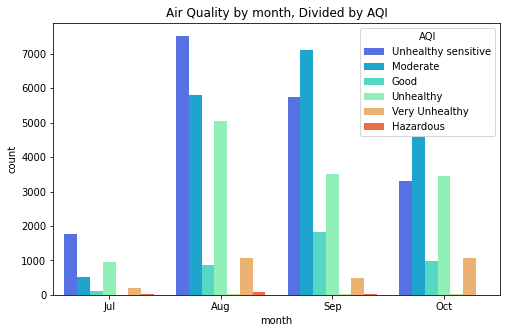

In [70]:
# creating stcked chart to show count of AQI by month
plt.figure(figsize=(8,5))
sns.countplot(x='month',data=air_df, palette='rainbow', hue='AQI')
plt.title("Air Quality by month, Divided by AQI")

August was the month that had the highest rate of **unhealthy sensitive** air quality index.

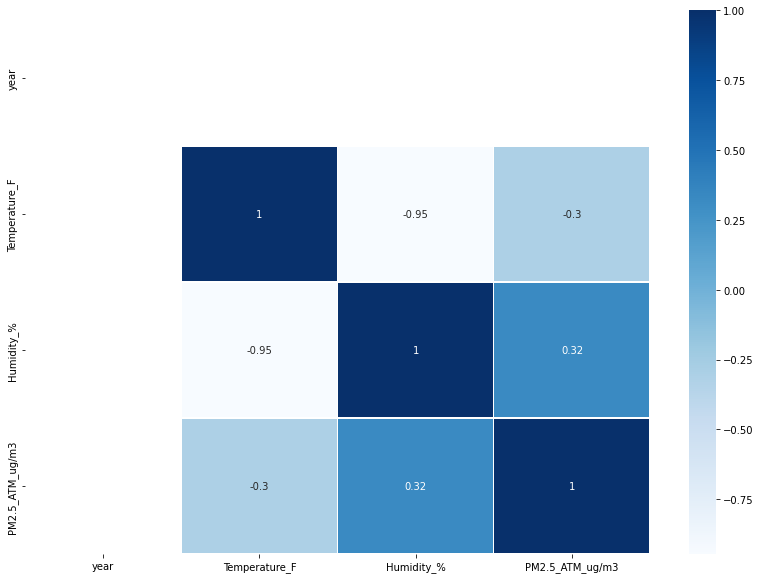

In [43]:
# correlation 
# Ploting a heatmat
# using seaborn 
# 
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(air_df.corr(), cmap=colormap, annot=True, linewidths=0.2)

Temp and humidity have strong negative correlation.

Humidity and PM2.5 have a weak positive correlation

Temp and PM2.5 have a weak negative correlation.

In [71]:
# Let's import a further transformed dataset similar to the one above and get more insights.
air_clean =  pd.read_csv('/content/drive/MyDrive/AirQuality/Cleaned_data.csv')

In [72]:
# Lets check the data set
air_clean.head()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time,day_of_month,month,year,days_of_week,day_in_week,weekdays_end,hour,AM_PM,Air_quality
0,198,89,50,40.78,2021-07-26,16:45:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
1,199,89,50,40.09,2021-07-26,16:48:03,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
2,200,89,50,37.93,2021-07-26,16:49:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
3,201,89,50,33.18,2021-07-26,16:54:03,26,July,2021,0,Monday,Weekdays,16,PM,Moderate
4,202,89,50,37.84,2021-07-26,16:55:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy


Text(0.5, 1.0, 'Air Quality by Weekends/weekdays, Divided by AQI')

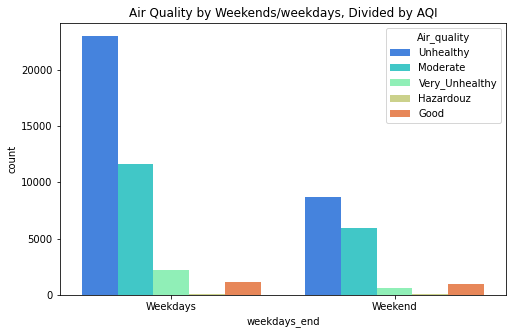

In [76]:
# Lets check the AQI in realtion to the week datys and weekends
plt.figure(figsize=(8,5))
sns.countplot(x='weekdays_end',data=air_clean, palette='rainbow', hue='Air_quality')
plt.title("Air Quality by Weekends/weekdays, Divided by AQI")

The air quality is mostly compromised on the weekdays according to the plot above. 

Text(0.5, 1.0, 'Air Quality by day in week, Divided by AQI')

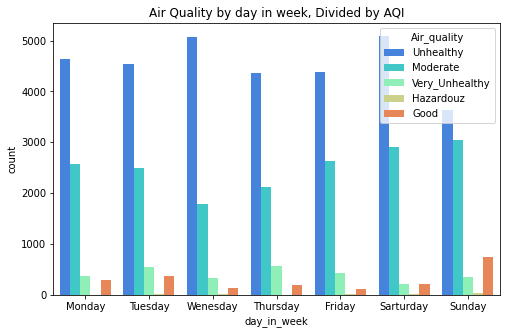

In [77]:
# Lets check the AQI in realtion to the week days 
plt.figure(figsize=(8,5))
sns.countplot(x='day_in_week',data=air_clean, palette='rainbow', hue='Air_quality')
plt.title("Air Quality by day in week, Divided by AQI")

On Wednesday's and Saturday's it seems the air quality is worse. However, the other days are not that much better off as they closely follow behind.

Text(0.5, 1.0, 'Air Quality by AM_PM, Divided by AQI')

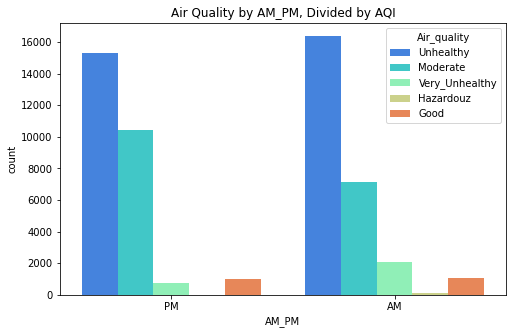

In [78]:
# Lets check the AQI in realtion to the AM_PM
plt.figure(figsize=(8,5))
sns.countplot(x='AM_PM',data=air_clean, palette='rainbow', hue='Air_quality')
plt.title("Air Quality by AM_PM, Divided by AQI")

The air quality is mostly compromised in the AM ie.morning.

The difference between the AM and PM isn't quite large though.